# pythia-temporal-baselines

Compare (offset-based) Pythia prefetchers against:
- PC+address temporal correlation: ISB, Voyager (TODO)
- Address temporal correlation prefetchers: Domino, STMS

Can do comparisons across:
- [Benchmark suites](#plots-suites)
- [Single becnhmarks](#plots-single-benchmarks)


In [38]:
from utils import plots, tables, utils
from matplotlib import cm
import numpy as np
%matplotlib widget

In [39]:
paths = {
    'baseline': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/degree1.csv',
    'voyager': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/degree1_voyager.csv',
    'addr_ideal_pc': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_address_ideal/pc.csv',
    'addr_ideal_pc_2': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_address_ideal/pc_2.csv', # Distance of 2
    'addr_ideal_pc_3': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_address_ideal/pc_3.csv', # Distance of 3
    'addr_ideal_pc_4': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_address_ideal/pc_4.csv', # Distance of 4
    'addr_ideal_global': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_address_ideal/global.csv',
    'addr_ideal_global_2': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_address_ideal/global_2.csv', # Distance of 2
    'addr_ideal_global_3': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_address_ideal/global_3.csv', # Distance of 3
    'addr_ideal_global_4': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_address_ideal/global_4.csv', # Distance of 4
    'addr_ideal_global_8': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_address_ideal/global_8.csv', # Distance of 8
    'addr_ideal_global_16': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_address_ideal/global_16.csv', # Distance of 16
    'addr_ideal_global_32': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_address_ideal/global_32.csv', # Distance of 32
    'addr_ideal_global_64': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_address_ideal/global_64.csv', # Distance of 64
    'addr_ideal_global_128': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_address_ideal/global_128.csv', # Distance of 128
    'addr_ideal_global_256': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_address_ideal/global_256.csv', # Distance of 256
}
suites = {
    'SPEC/GAP irregular': [
        'astar', 'bfs', 'cc', 'mcf', 'omnetpp', 'pr', 'soplex', 'sphinx3', 
        'xalancbmk'
    ]
}
metrics  = [
    'ipc_improvement', 
    #'LLC_avg_degree', 
    'LLC_accuracy', 
    'LLC_coverage',
    #'LLC_mpki_reduction', 
]
features = [
    {'Address'},
    {'PC_Address'},
    {'Delta_Path'},
    {'Delta_Path', 'PC_Delta'},
    {'Delta_Path', 'PC_Address'},
    {'Delta_Path', 'Address'},
]
baselines = [
    'bo',
    'domino',
    'stms',
    'sisb',
    'ac_table',
]

# Plots (suites)
Fix prefetch degree to 1 for everything (except Bingo), and compare to Bingo, SPP and Bingo+SPP hybrid.

In [40]:
dfs = {
    'pythia': tables.load_stats_csv_pythia(paths['baseline'], features),
    'baseline': tables.load_stats_csv(paths['baseline'], baselines, prefetchers_level='llc'),
    'voyager': tables.load_stats_csv(paths['voyager'], ['from_file'], prefetchers_level='llc'),
    'addr_ideal_pc': tables.load_stats_csv(paths['addr_ideal_pc'], ['from_file'], prefetchers_level='llc'),
    'addr_ideal_pc_2': tables.load_stats_csv(paths['addr_ideal_pc_2'], ['from_file'], prefetchers_level='llc'),
    'addr_ideal_pc_3': tables.load_stats_csv(paths['addr_ideal_pc_3'], ['from_file'], prefetchers_level='llc'),
    'addr_ideal_pc_4': tables.load_stats_csv(paths['addr_ideal_pc_4'], ['from_file'], prefetchers_level='llc'),
    'addr_ideal_global': tables.load_stats_csv(paths['addr_ideal_global'], ['from_file'], prefetchers_level='llc'),
    'addr_ideal_global_2': tables.load_stats_csv(paths['addr_ideal_global_2'], ['from_file'], prefetchers_level='llc'),
    'addr_ideal_global_3': tables.load_stats_csv(paths['addr_ideal_global_3'], ['from_file'], prefetchers_level='llc'),
    'addr_ideal_global_4': tables.load_stats_csv(paths['addr_ideal_global_4'], ['from_file'], prefetchers_level='llc'),
    'addr_ideal_global_8': tables.load_stats_csv(paths['addr_ideal_global_8'], ['from_file'], prefetchers_level='llc'),
    'addr_ideal_global_16': tables.load_stats_csv(paths['addr_ideal_global_16'], ['from_file'], prefetchers_level='llc'),
    'addr_ideal_global_32': tables.load_stats_csv(paths['addr_ideal_global_32'], ['from_file'], prefetchers_level='llc'),
    'addr_ideal_global_64': tables.load_stats_csv(paths['addr_ideal_global_64'], ['from_file'], prefetchers_level='llc'),
    'addr_ideal_global_128': tables.load_stats_csv(paths['addr_ideal_global_128'], ['from_file'], prefetchers_level='llc'),
    'addr_ideal_global_256': tables.load_stats_csv(paths['addr_ideal_global_256'], ['from_file'], prefetchers_level='llc'),
}

In [41]:
# Add Ideal Timely baselines
dfs['addr_ideal_pc_timely'] = {
    'best': tables.merge_best_prefetcher(
        dfs['addr_ideal_pc']['from_file'], 
        dfs['addr_ideal_pc_2']['from_file'],
        dfs['addr_ideal_pc_3']['from_file'],
        dfs['addr_ideal_pc_4']['from_file'],
        metric='ipc', method='max'
)}

dfs['addr_ideal_global_timely'] = {
    'best': tables.merge_best_prefetcher(
        dfs['addr_ideal_global']['from_file'], 
        dfs['addr_ideal_global_2']['from_file'],
        dfs['addr_ideal_global_3']['from_file'],
        dfs['addr_ideal_global_4']['from_file'],
        dfs['addr_ideal_global_8']['from_file'],
        dfs['addr_ideal_global_16']['from_file'],
        dfs['addr_ideal_global_32']['from_file'],
        dfs['addr_ideal_global_64']['from_file'],
        dfs['addr_ideal_global_128']['from_file'],
        dfs['addr_ideal_global_256']['from_file'],
        metric='ipc', method='max'
)}

#display(dfs['addr_ideal_pc_timely']['best'][['full_trace', 'ipc']])
#display(dfs['addr_ideal_pc']['from_file'][['full_trace', 'ipc']])

## Ideal Address at different static distances

=== SPEC/GAP irregular ===


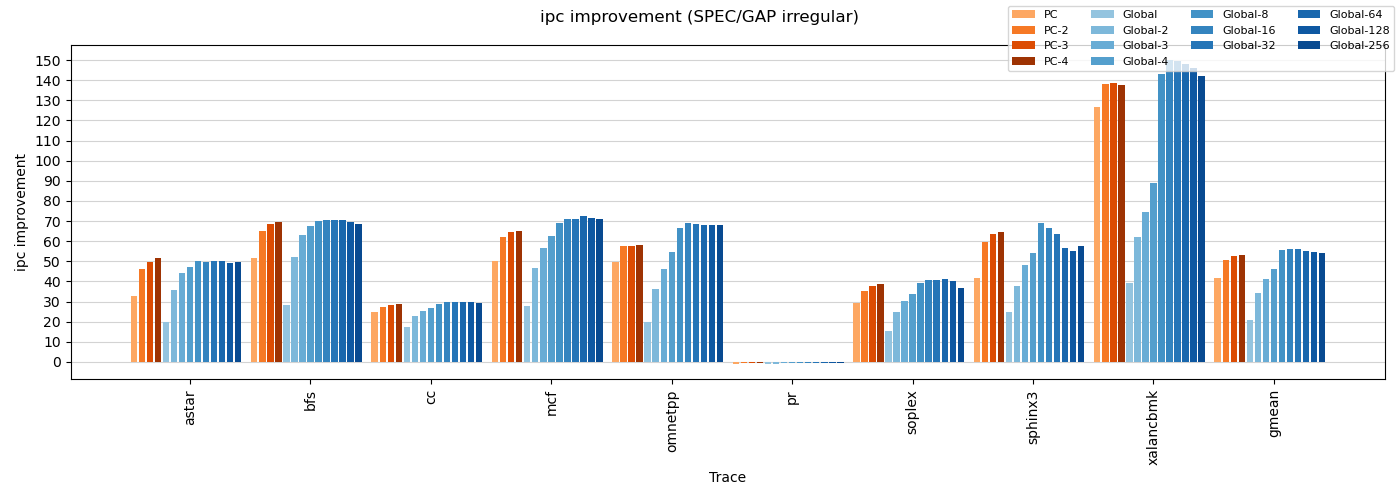

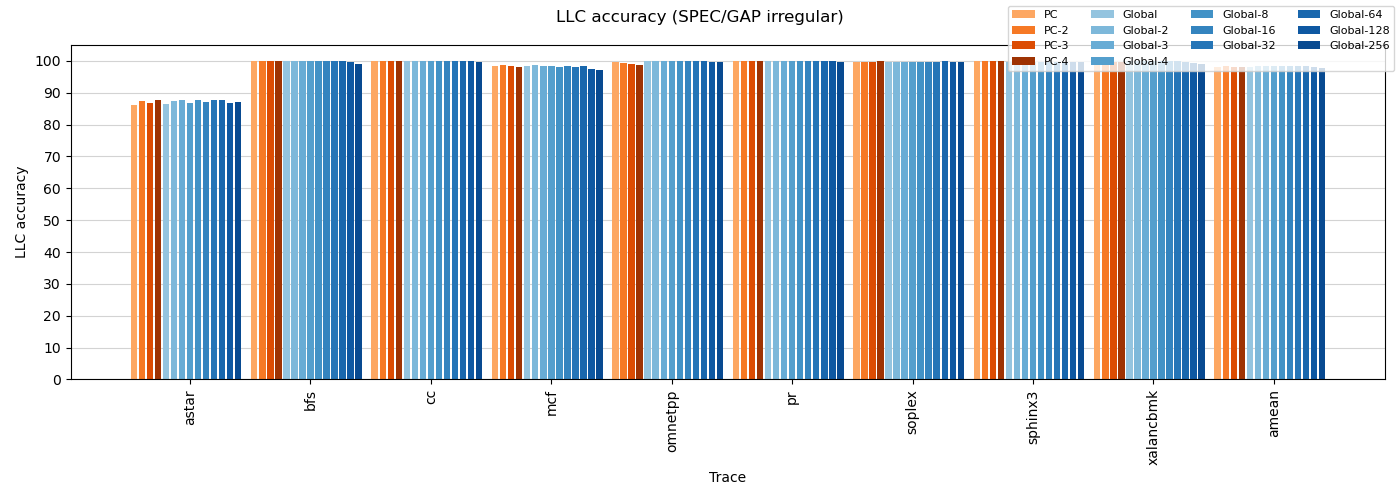

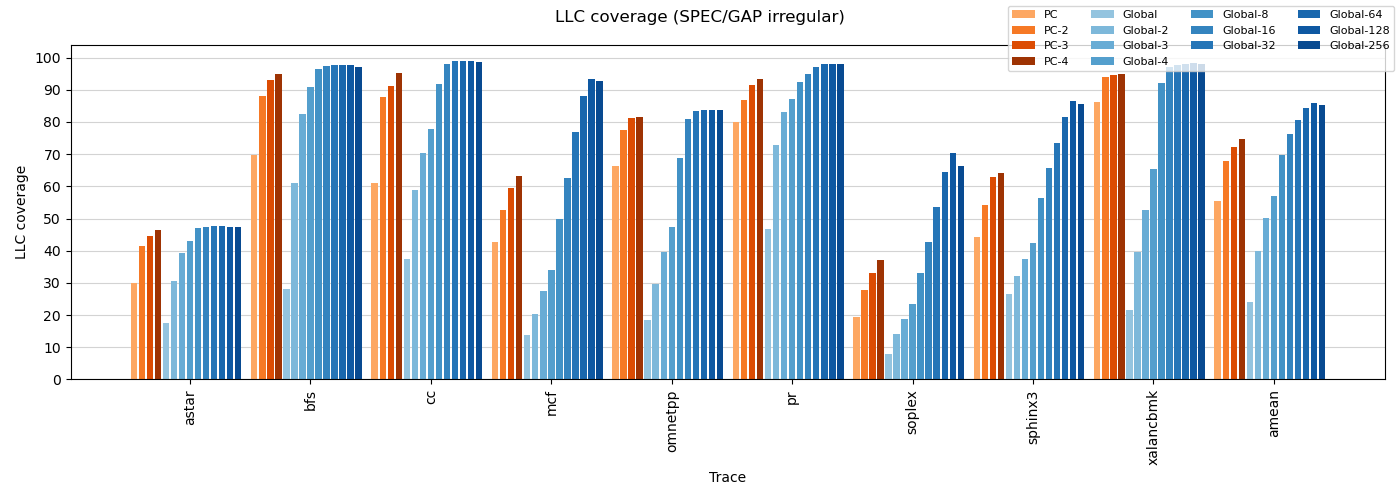

In [61]:
from importlib import reload
reload(plots)

pcaddr_dist_df = {
    'PC': dfs['addr_ideal_pc']['from_file'],
    'PC-2': dfs['addr_ideal_pc_2']['from_file'],
    'PC-3': dfs['addr_ideal_pc_3']['from_file'],
    'PC-4': dfs['addr_ideal_pc_4']['from_file'],
    'Global': dfs['addr_ideal_global']['from_file'],
    'Global-2': dfs['addr_ideal_global_2']['from_file'],
    'Global-3': dfs['addr_ideal_global_3']['from_file'],
    'Global-4': dfs['addr_ideal_global_4']['from_file'],
    'Global-8': dfs['addr_ideal_global_8']['from_file'],
    'Global-16': dfs['addr_ideal_global_16']['from_file'],
    'Global-32': dfs['addr_ideal_global_32']['from_file'],
    'Global-64': dfs['addr_ideal_global_64']['from_file'],
    'Global-128': dfs['addr_ideal_global_128']['from_file'],
    'Global-256': dfs['addr_ideal_global_256']['from_file'],
}

pc_colormap = cm.get_cmap('Oranges')
global_colormap = cm.get_cmap('Blues')
pc_color_idxs = np.linspace(0.4, 0.9, 4)
glob_color_idxs = np.linspace(0.4, 0.9, 10)

pcaddr_dist_colors = {
    'PC': pc_colormap(pc_color_idxs[0]),
    'PC-2': pc_colormap(pc_color_idxs[1]),
    'PC-3': pc_colormap(pc_color_idxs[2]),
    'PC-4': pc_colormap(pc_color_idxs[3]),
    'Global': global_colormap(glob_color_idxs[0]),
    'Global-2': global_colormap(glob_color_idxs[1]),
    'Global-3': global_colormap(glob_color_idxs[2]),
    'Global-4': global_colormap(glob_color_idxs[3]),
    'Global-8': global_colormap(glob_color_idxs[4]),
    'Global-16': global_colormap(glob_color_idxs[5]),
    'Global-32': global_colormap(glob_color_idxs[6]),
    'Global-64': global_colormap(glob_color_idxs[7]),
    'Global-128': global_colormap(glob_color_idxs[8]),
    'Global-256': global_colormap(glob_color_idxs[9]),
}
legend_kwargs = {
    'fontsize': 8,
    'ncol': 4,
}
plots.plot_everything(
    pcaddr_dist_df, suites=suites, metrics=metrics, colors=pcaddr_dist_colors,
    legend_kwargs=legend_kwargs,
    figsize=(14, 5))

## PC: Ideal vs. baselines

=== SPEC/GAP irregular ===


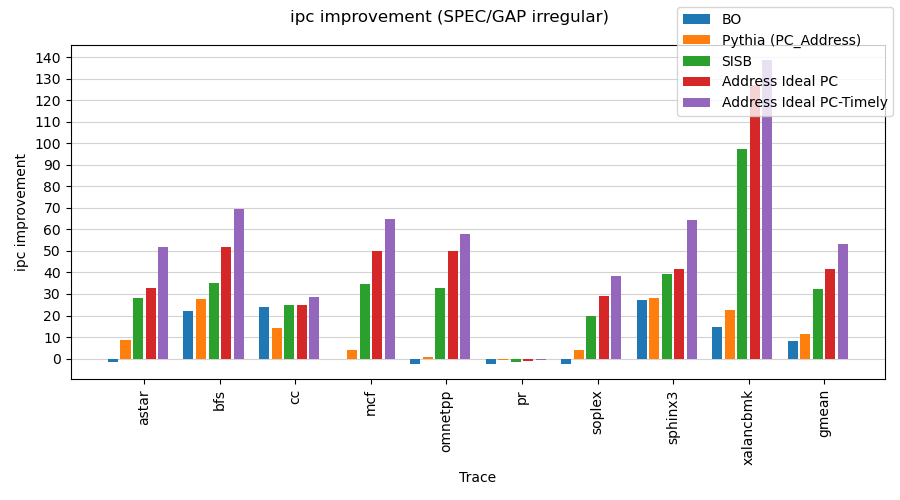

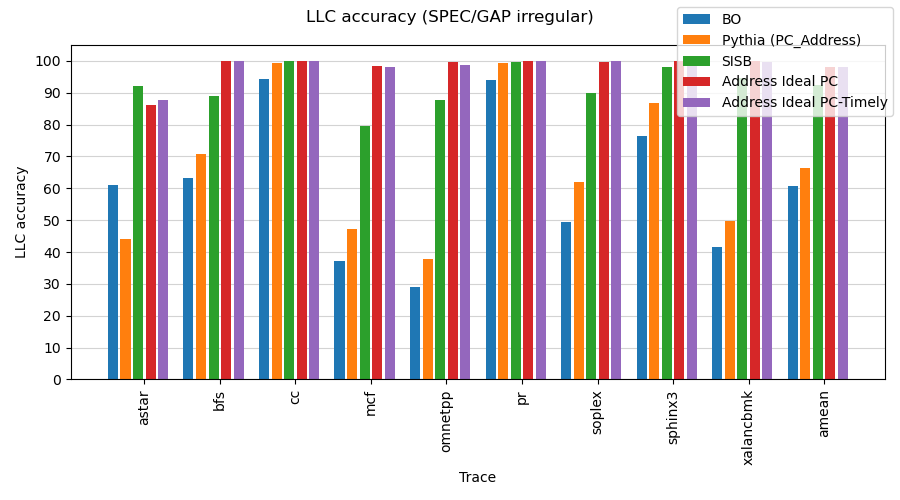

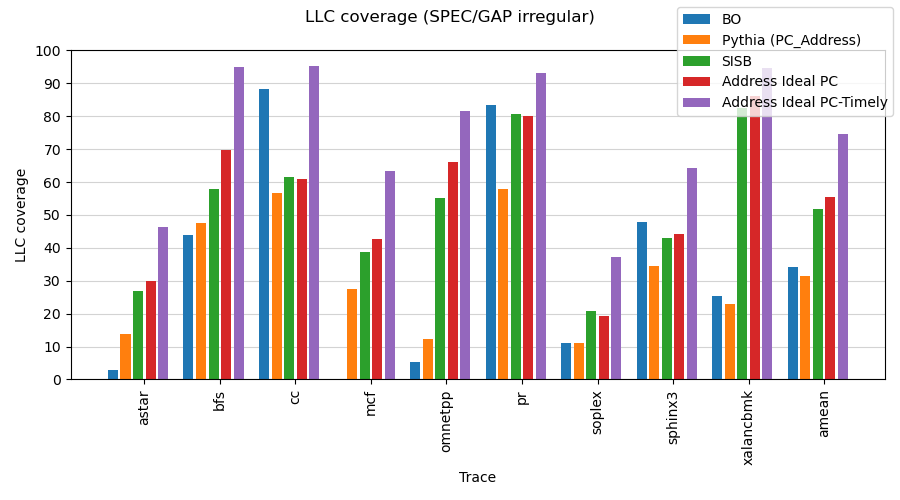

In [9]:
pcaddr_df = {
    'BO': dfs['baseline']['bo'],
    'Pythia (PC_Address)': dfs['pythia']['PC_Address'],
    #'Pythia (Delta_Path)': dfs['pythia']['Delta_Path'],
    'SISB': dfs['baseline']['sisb'],
    #'AC Table': dfs['baseline']['ac_table'],
    'Address Ideal PC': dfs['addr_ideal_pc']['from_file'],
    #'Address Ideal PC-4': dfs['addr_ideal_pc_4']['from_file'],
    'Address Ideal PC-Timely': dfs['addr_ideal_pc_timely']['best'],
    #'Address Ideal (Global)': dfs['addr_ideal_global']['from_file'],
    #'Voyager': dfs['voyager']['from_file'],
}

plots.plot_everything(
    pcaddr_df, suites=suites, metrics=metrics,
    figsize=(9, 5))

## Global: Ideal vs. baselines

=== SPEC/GAP irregular ===


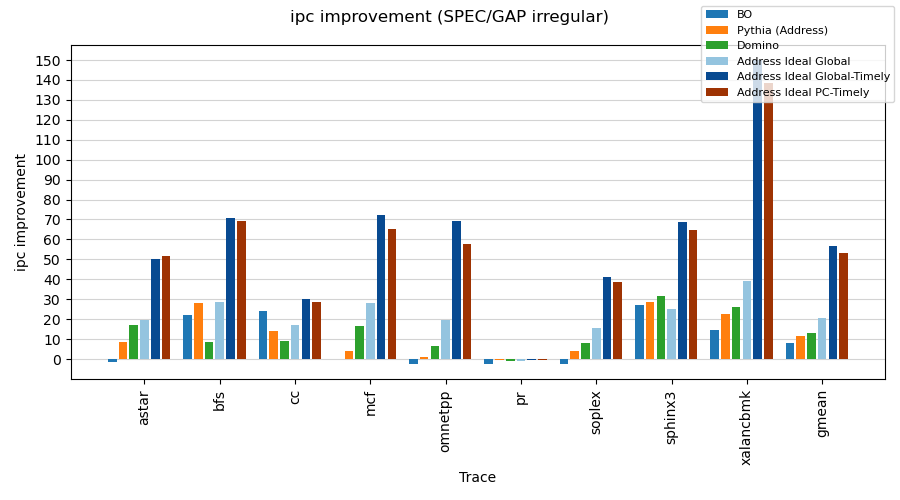

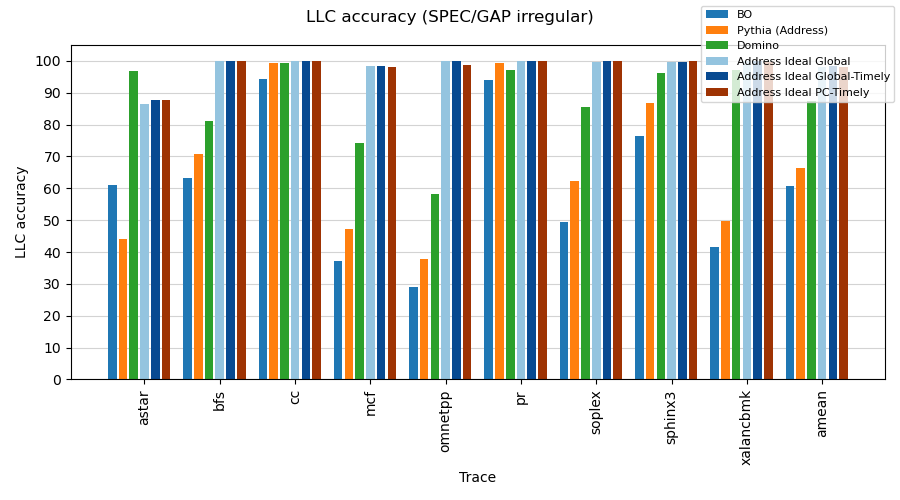

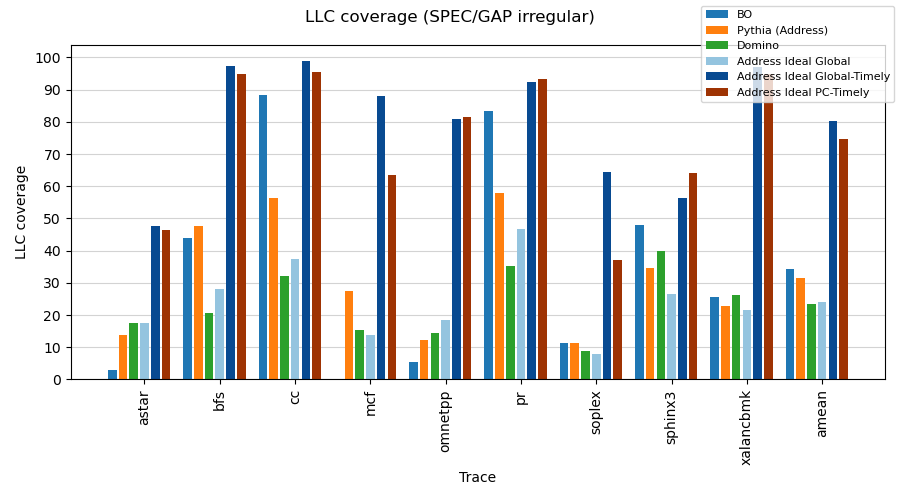

In [68]:
addr_df = {
    'BO': dfs['baseline']['bo'],
    'Pythia (Address)': dfs['pythia']['Address'],
    #'STMS': dfs['baseline']['stms'],
    'Domino': dfs['baseline']['domino'],
    'Address Ideal Global': dfs['addr_ideal_global']['from_file'],
    #'Address Ideal Global-4': dfs['addr_ideal_global_4']['from_file'],
    'Address Ideal Global-Timely': dfs['addr_ideal_global_timely']['best'],
    'Address Ideal PC-Timely': dfs['addr_ideal_pc_timely']['best'],
    #'SISB': dfs['baseline']['sisb'],
}

addr_df_colors = {
    'BO': 'C0',
    'Pythia (Address)': 'C1',
    'Domino': 'C2',
    'Address Ideal Global': global_colormap(0.4),
    'Address Ideal Global-Timely': global_colormap(0.9),
    'Address Ideal PC-Timely': pc_colormap(0.9),
}

legend_kwargs = {
    'fontsize': 8,
    'ncol': 1,
}

plots.plot_everything(
    addr_df, suites=suites, metrics=metrics, figsize=(9, 5),
    colors=addr_df_colors, legend_kwargs=legend_kwargs)

# Tables

## Ideal Address at different static distances

In [7]:
tables.table_everything(pcaddr_dist_df, suites=suites, metrics=metrics)

=== SPEC/GAP irregular ===
Address Ideal PC


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
astar,32.63,86.30,29.99
bfs,51.81,99.98,69.60
cc,24.82,100.00,60.92
mcf,49.97,98.30,42.72
omnetpp,49.79,99.69,66.19
pr,-1.19,99.99,79.98
soplex,29.06,99.76,19.32
sphinx3,41.77,99.96,44.12
xalancbmk,126.83,99.88,86.19


Address Ideal PC-2


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
astar,46.02,87.42,41.42
bfs,64.84,99.97,88.00
cc,27.32,99.99,87.82
mcf,61.85,98.67,52.77
omnetpp,57.66,99.36,77.55
pr,-0.69,99.99,86.89
soplex,35.39,99.80,27.92
sphinx3,59.44,99.92,54.16
xalancbmk,138.30,99.80,93.82


Address Ideal PC-3


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
astar,49.50,86.91,44.64
bfs,68.30,99.95,92.87
cc,28.28,99.99,91.02
mcf,64.77,98.54,59.41
omnetpp,57.72,99.04,81.21
pr,-0.62,99.98,91.37
soplex,37.64,99.80,33.10
sphinx3,63.49,99.88,62.75
xalancbmk,138.53,99.72,94.72


Address Ideal PC-4


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
astar,51.82,87.79,46.30
bfs,69.35,99.95,94.90
cc,28.70,99.99,95.33
mcf,65.02,98.08,63.35
omnetpp,57.91,98.72,81.64
pr,-0.60,99.98,93.26
soplex,38.49,99.83,37.07
sphinx3,64.50,99.86,64.16
xalancbmk,137.50,99.67,94.94


Address Ideal Global


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
astar,19.78,86.35,17.63
bfs,28.46,100.00,28.08
cc,17.12,100.00,37.29
mcf,27.90,98.26,13.70
omnetpp,19.71,99.92,18.61
pr,-1.03,99.99,46.77
soplex,15.44,99.75,7.78
sphinx3,24.97,99.51,26.44
xalancbmk,39.15,99.96,21.45


Address Ideal Global-2


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
astar,35.76,87.56,30.52
bfs,52.21,99.99,60.99
cc,22.88,100.00,58.77
mcf,46.46,98.63,20.43
omnetpp,36.10,99.95,29.79
pr,-0.90,100.00,72.91
soplex,24.65,99.76,14.01
sphinx3,37.61,99.66,32.26
xalancbmk,61.88,99.97,39.63


Address Ideal Global-3


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
astar,44.05,87.81,39.24
bfs,63.24,99.99,82.53
cc,25.44,100.00,70.30
mcf,56.71,98.25,27.51
omnetpp,46.32,99.94,39.59
pr,-0.65,100.00,83.02
soplex,30.08,99.67,18.82
sphinx3,48.00,99.72,37.34
xalancbmk,74.25,99.94,52.71


Address Ideal Global-4


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
astar,47.08,86.77,42.89
bfs,67.35,99.99,90.96
cc,26.83,100.00,77.86
mcf,62.62,98.42,34.07
omnetpp,54.45,99.94,47.49
pr,-0.55,100.00,87.28
soplex,33.85,99.80,23.32
sphinx3,54.31,99.69,42.28
xalancbmk,89.05,99.86,65.50


## PC: Ideal vs. baselines

In [10]:
tables.table_everything(pcaddr_df, suites=suites, metrics=metrics)

=== SPEC/GAP irregular ===
BO


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
astar,-1.72,61.15,2.91
bfs,22.22,63.12,43.79
cc,24.02,94.29,88.31
mcf,0.03,37.24,0.03
omnetpp,-2.57,29.03,5.30
pr,-2.45,93.87,83.33
soplex,-2.63,49.38,11.22
sphinx3,27.24,76.42,47.98
xalancbmk,14.58,41.53,25.49


Pythia (PC_Address)


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
astar,8.47,44.18,13.72
bfs,27.88,70.89,47.50
cc,14.04,99.37,56.69
mcf,4.10,47.21,27.53
omnetpp,0.80,37.81,12.19
pr,-0.67,99.43,57.78
soplex,3.84,62.07,11.20
sphinx3,28.26,86.81,34.41
xalancbmk,22.79,49.84,22.84


SISB


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
astar,28.32,92.22,26.82
bfs,34.88,88.87,58.04
cc,25.11,99.93,61.54
mcf,34.55,79.42,38.80
omnetpp,32.97,87.75,55.30
pr,-1.60,99.81,80.54
soplex,19.86,89.97,20.86
sphinx3,39.08,98.22,42.94
xalancbmk,97.18,94.75,82.64


Address Ideal PC


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
astar,32.63,86.30,29.99
bfs,51.81,99.98,69.60
cc,24.82,100.00,60.92
mcf,49.97,98.30,42.72
omnetpp,49.79,99.69,66.19
pr,-1.19,99.99,79.98
soplex,29.06,99.76,19.32
sphinx3,41.77,99.96,44.12
xalancbmk,126.83,99.88,86.19


Address Ideal PC-Timely


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
astar,51.82,87.79,46.30
bfs,69.35,99.95,94.90
cc,28.70,99.99,95.33
mcf,65.02,98.08,63.35
omnetpp,57.91,98.72,81.64
pr,-0.60,99.98,93.26
soplex,38.49,99.83,37.07
sphinx3,64.50,99.86,64.16
xalancbmk,138.53,99.72,94.72


## Global: Ideal vs. baselines

In [67]:
tables.table_everything(addr_df, suites=suites, metrics=metrics)

=== SPEC/GAP irregular ===
BO


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
astar,-1.72,61.15,2.91
bfs,22.22,63.12,43.79
cc,24.02,94.29,88.31
mcf,0.03,37.24,0.03
omnetpp,-2.57,29.03,5.30
pr,-2.45,93.87,83.33
soplex,-2.63,49.38,11.22
sphinx3,27.24,76.42,47.98
xalancbmk,14.58,41.53,25.49


Pythia (Address)


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
astar,8.46,44.22,13.72
bfs,27.87,70.88,47.52
cc,14.04,99.43,56.42
mcf,4.08,47.20,27.51
omnetpp,0.79,37.82,12.18
pr,-0.65,99.42,57.86
soplex,3.89,62.20,11.41
sphinx3,28.37,86.79,34.48
xalancbmk,22.79,49.84,22.84


Domino


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
astar,17.18,96.82,17.65
bfs,8.53,81.04,20.69
cc,8.82,99.19,32.04
mcf,16.39,74.18,15.35
omnetpp,6.38,58.16,14.41
pr,-0.82,97.30,35.17
soplex,8.19,85.39,8.79
sphinx3,31.49,96.30,40.02
xalancbmk,26.26,97.31,26.09


Address Ideal Global


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
astar,19.78,86.35,17.63
bfs,28.46,100.00,28.08
cc,17.12,100.00,37.29
mcf,27.90,98.26,13.70
omnetpp,19.71,99.92,18.61
pr,-1.03,99.99,46.77
soplex,15.44,99.75,7.78
sphinx3,24.97,99.51,26.44
xalancbmk,39.15,99.96,21.45


Address Ideal Global-Timely


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
astar,50.32,87.62,47.68
bfs,70.51,99.98,97.32
cc,29.93,99.99,98.90
mcf,72.48,98.29,88.08
omnetpp,69.04,99.92,80.84
pr,-0.48,100.00,92.38
soplex,41.29,99.83,64.55
sphinx3,68.85,99.75,56.35
xalancbmk,149.91,99.91,97.07
